In [117]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [118]:
# TODO:
# 1. Load the cancer dataset
# 2. Perform PCA
# 3. Train a linear SVM using the first two principal components
# 4. Plot the decision boundary

In [119]:
# Function to load and prepare the cancer dataset
def load_and_prepare_data():
    # Load the breast cancer dataset from sklearn.datasets
    # Extract the data (features) and target labels
    # Standardize the features using StandardScaler
    bcDataset = load_breast_cancer()
    features = bcDataset.data
    target = bcDataset.target

    standardScaler = StandardScaler()
    scaledData = standardScaler.fit_transform(features)

    return target, scaledData

    pass

In [120]:
# Function to perform PCA on the cancer dataset
def perform_pca(data):
    # Initialize a PCA object
    # Fit the PCA on the standardized data
    # Transform the data onto the principal components
    pca = PCA()
    pca_data = pca.fit_transform(data)

    return pca, pca_data

    pass


In [121]:
# Function to plot the results of PCA
def plot_pca_results(pca, pca_data, target):
    # Create a scatter plot of the first three principal components
    # Color code points based on the target labels
    # Optionally, create additional plots as necessary (e.g., scree plot to show explained variance)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=target, cmap='viridis', edgecolor='k', alpha=0.7)

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('3D PCA - Breast Cancer Dataset')
    
    cbar = plt.colorbar(scatter)
    cbar.set_label('Target Labels')

    plt.show()

    pass


In [122]:
#scree plot
def screePlot(pca):
    singularValues = pca.singular_values_
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(singularValues) + 1), singularValues, marker='o', linestyle='--', color='r')
    
    plt.xlabel('Principal Component')
    plt.ylabel('Singular Values')
    plt.title('Scree Plot - Singular Values of Principal Components')
    
    plt.show()

    pass

In [123]:
#cumulative variance
def cumulativeVariancePlot(pca):
    singularValues = pca.singular_values_
    
    cumulativeVariance = np.cumsum(singularValues) / np.sum(singularValues)
    
    plt.figure(figsize=(8, 6))
    plt.plot(cumulativeVariance, marker='o', color='b', linestyle='--')
    plt.xlabel('k Principal Components')
    plt.ylabel('Cumulative Variance')
    plt.title('Cumulative Variance by Principal Components')
    
    plt.show()

    pass

In [124]:
#explained variance
def explainedVariancePlot(pca):
    singularValues = pca.singular_values_
    sumx = 0
    varianceExplained = []

    for a in range(len(singularValues)):
        sumx = sumx + singularValues[a]
    
    for a in range(len(singularValues)):
        varianceExplained.append(singularValues[a]/sumx)

    plt.figure(figsize=(8, 6))
    plt.plot(varianceExplained, marker='o', color='b', linestyle='--')
    plt.xlabel('Principal Components')
    plt.ylabel('Principal Component Variance')
    plt.title('Variance explained by each principal component')

    plt.show()

    pass

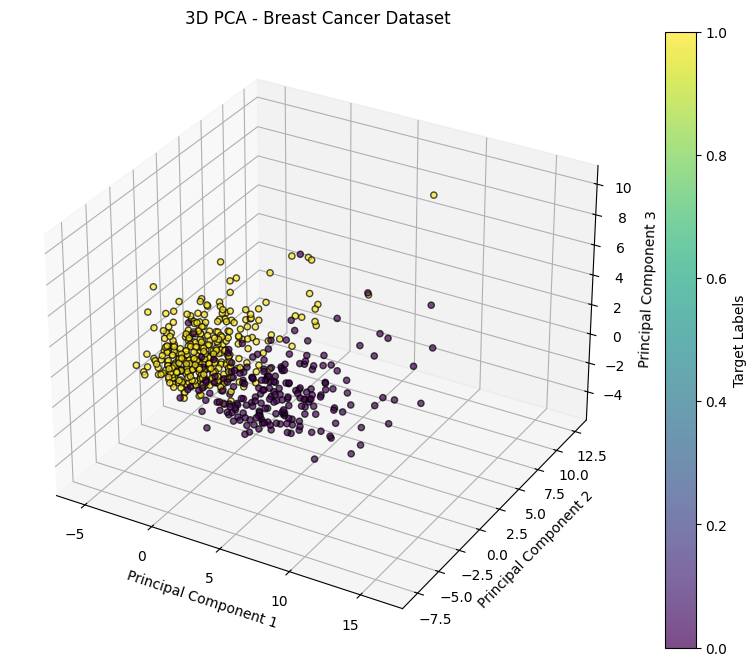

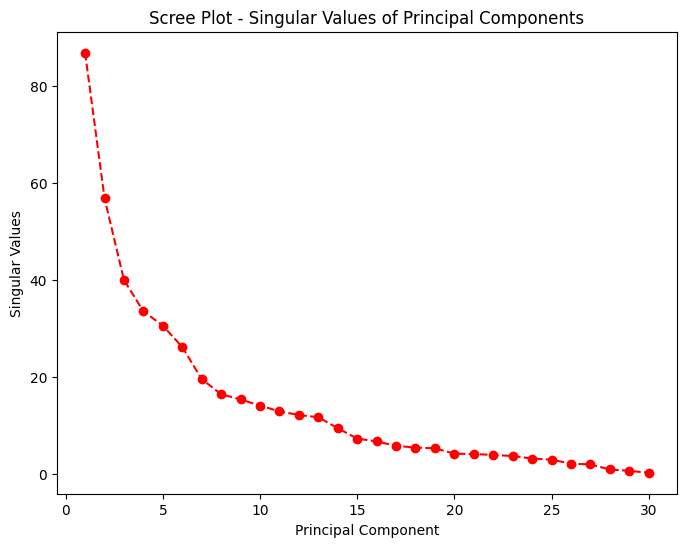

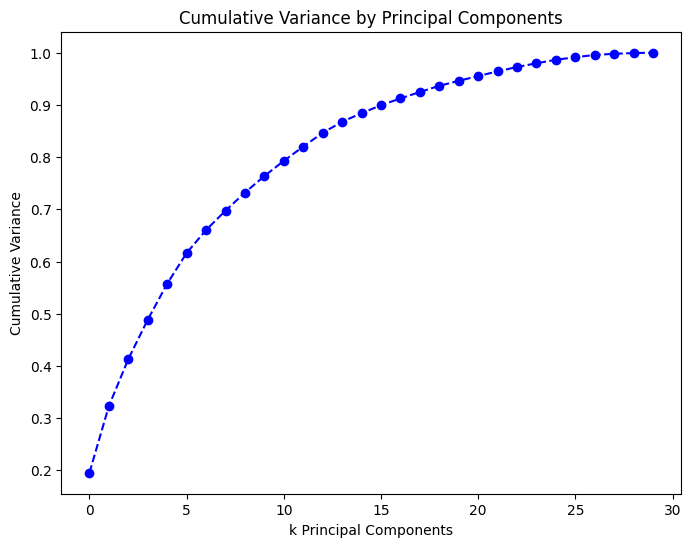

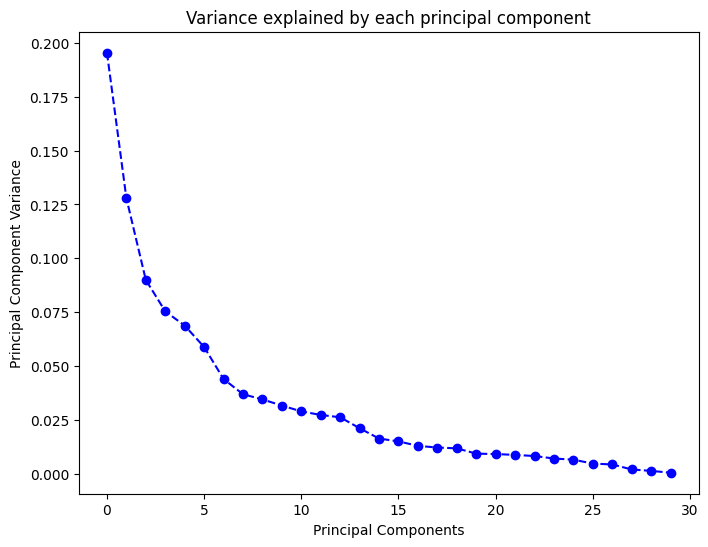

In [125]:
if __name__ == "__main__":
    #call functions here
    #load scaled data and target
    bcTarget, bcScaledData = load_and_prepare_data()

    #perform PCA
    pca, pca_data = perform_pca(bcScaledData)

    #plot PCA
    plot_pca_results(pca, pca_data, bcTarget)

    #plot scree
    screePlot(pca)

    #plot cumulative variance
    cumulativeVariancePlot(pca)

    #plot explained variance
    explainedVariancePlot(pca)

    pass